In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import umap
import seaborn as sns
from statannotations.Annotator import Annotator

/neurospin/dico/fred/Runs/01_betaVAE/Program/venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/neurospin/dico/fred/Runs/01_betaVAE/Program/venv/lib/python3.12/site-packages/umap/__init__.py:36: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources


In [12]:
Reconstruc_error_UKB = pd.read_csv("/neurospin/dico/fred/Runs/01_betaVAE/Program/2023_jlaval_STSbabies/betaVAE/notebooks/fred/with_all_the_regions/test_Central_sulcus/SC-sylv_right_UKB_16-20-03_123/Reconstruction_error.csv")
Reconstruc_error_HCP = pd.read_csv("/neurospin/dico/fred/Runs/01_betaVAE/Program/2023_jlaval_STSbabies/betaVAE/notebooks/fred/with_all_the_regions/test_Central_sulcus/SC-sylv_right_UKB_16-20-03_123/hcp/Reconstruction_error.csv")
Reconstruc_error_epilepsy= pd.read_csv("/neurospin/dico/fred/Runs/01_betaVAE/Program/2023_jlaval_STSbabies/betaVAE/notebooks/fred/with_all_the_regions/test_Central_sulcus/SC-sylv_right_UKB_16-20-03_123/epilepsy_PBS/Reconstruction_error.csv")

In [13]:
Participants_epilepsy=pd.read_csv("/neurospin/dico/data/human/epilepsy_PBS/participants.tsv", sep="\t")

In [14]:
epilepsy_controls= Participants_epilepsy[Participants_epilepsy["Diagnosis"]=="controls"]
epilepsy_irm_neg= Participants_epilepsy[Participants_epilepsy["Diagnosis"]=="irm_negatives_centrales"]
epilepsy_irm_pos= Participants_epilepsy[Participants_epilepsy["Diagnosis"]=="irm_positives_centrales"]

In [15]:
#We rename the first colomn 

Reconstruc_error_epilepsy  = Reconstruc_error_epilepsy.rename(columns={Reconstruc_error_epilepsy.columns[0]: "Index"})


In [16]:
Reconstruc_error_controls = Reconstruc_error_epilepsy.merge(epilepsy_controls[["Index"]], on="Index", how="inner")
Reconstruc_error_irm_negatives = Reconstruc_error_epilepsy.merge(epilepsy_irm_neg[["Index"]], on="Index", how="inner")
Reconstruc_error_irm_positives = Reconstruc_error_epilepsy.merge(epilepsy_irm_pos[["Index"]], on="Index", how="inner")

In [17]:
Reconstruc_error_UKB1 = pd.read_csv("/neurospin/dico/fred/Runs/01_betaVAE/Output/2025-09-11/17-17-04/Reconstruction_error.csv")
Reconstruc_error_HCP1 = pd.read_csv("/neurospin/dico/fred/Runs/01_betaVAE/Output/2025-09-11/17-17-04/hcp/Reconstruction_error.csv")
Reconstruc_error_epilepsy1= pd.read_csv("/neurospin/dico/fred/Runs/01_betaVAE/Output/2025-09-11/17-17-04/epilepsy_PBS/Reconstruction_error.csv")

In [18]:
#We rename the first colomn 

Reconstruc_error_epilepsy1  = Reconstruc_error_epilepsy1.rename(columns={Reconstruc_error_epilepsy1.columns[0]: "Index"})


In [19]:
Reconstruc_error_epilepsy1

,Index,0
0,control01,3204.688965
1,control02,2967.557129
2,control03,4133.406738
3,control04,2749.859619
4,control05,3387.500732
5,control06,3888.267578
6,control07,3099.226074
7,control08,3665.819824
8,control09,4185.279297
9,control10,2989.056152


In [20]:
Reconstruc_error_controls1 = Reconstruc_error_epilepsy1.merge(epilepsy_controls[["Index"]], on="Index", how="inner")
Reconstruc_error_irm_negatives1 = Reconstruc_error_epilepsy1.merge(epilepsy_irm_neg[["Index"]], on="Index", how="inner")
Reconstruc_error_irm_positives1 = Reconstruc_error_epilepsy1.merge(epilepsy_irm_pos[["Index"]], on="Index", how="inner")

In [ ]:
#Reconstruc_error_controls1

,Index,0
0,control01,3204.688965
1,control02,2967.557129
2,control03,4133.406738
3,control04,2749.859619
4,control05,3387.500732
5,control06,3888.267578
6,control07,3099.226074
7,control08,3665.819824
8,control09,4185.279297
9,control10,2989.056152


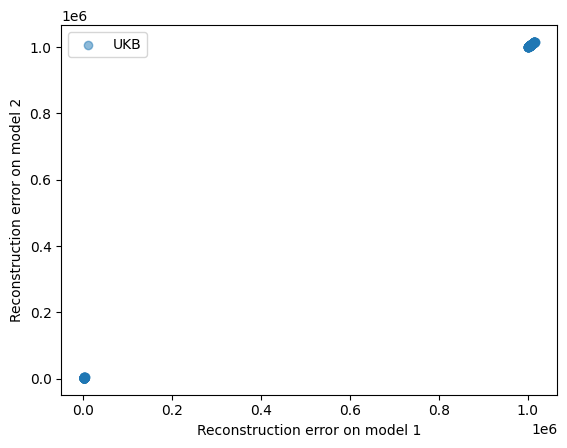

In [38]:
plt.scatter(Reconstruc_error_UKB1[:100], Reconstruc_error_UKB[:100], label='UKB', alpha=0.5)
plt.xlabel('Reconstruction error on model 1')
plt.ylabel('Reconstruction error on model 2')
plt.legend()
plt.show()

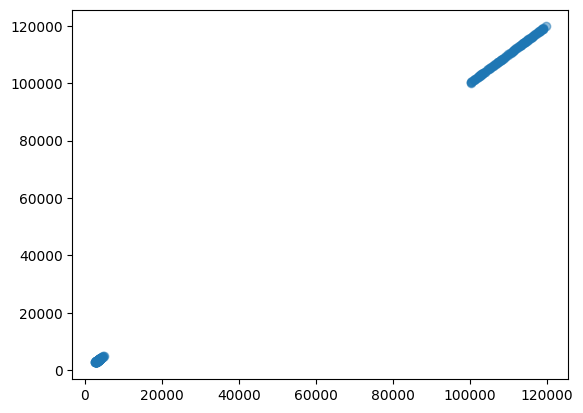

In [39]:
plt.scatter(Reconstruc_error_HCP1[:100], Reconstruc_error_HCP[:100], label='HCP', alpha=0.5)

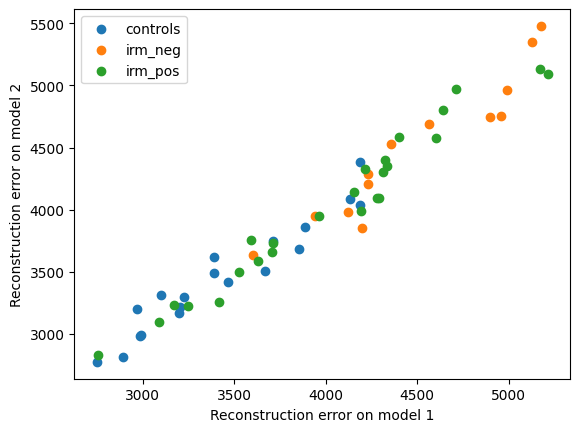

In [40]:
plt.scatter(Reconstruc_error_controls1.iloc[:,1], Reconstruc_error_controls.iloc[:,1], label='controls')
plt.scatter(Reconstruc_error_irm_negatives1.iloc[:,1], Reconstruc_error_irm_negatives.iloc[:,1], label='irm_neg')
plt.scatter(Reconstruc_error_irm_positives1.iloc[:,1], Reconstruc_error_irm_positives.iloc[:,1], label='irm_pos')
plt.xlabel('Reconstruction error on model 1')
plt.ylabel('Reconstruction error on model 2')
plt.legend()
plt.show()